In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
inputpath = './input/'

In [3]:
train_df = pd.read_csv(inputpath+'train.csv')
test_df = pd.read_csv(inputpath+'test.csv')
gender_df = pd.read_csv(inputpath+'gender_submission.csv')

print(train_df.shape)
print(test_df.shape)
print(gender_df.shape)

train_index = train_df.shape[0]
print('train_index: ' + str(train_index))

(891, 12)
(418, 11)
(418, 2)
train_index: 891


In [4]:
# check the data
print(train_df.head())
print('================')
print(test_df.head())
print('================')
print(gender_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [5]:
# join test_df and genger_df (test dataset) for future process
test_df_joined = test_df.join(gender_df.set_index('PassengerId'), on='PassengerId')
print(test_df_joined.shape)
# expect (418,12)
print(test_df_joined.head()) 

(418, 12)
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Survived  
0  34.5      0      0   330911   7.8292   NaN        Q         0  
1  47.0      1      0   363272   7.0000   NaN        S         1  
2  62.0      0      0   240276   9.6875   NaN        Q         0  
3  27.0      0      0   315154   8.6625   NaN        S         0  
4  22.0      1      1  3101298  12.2875   NaN        S         1  


count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

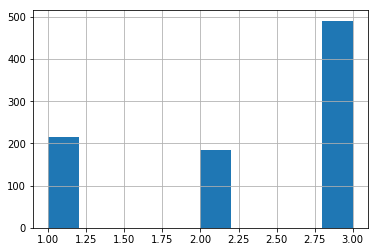

In [6]:
train_df['Pclass'].hist()
train_df['Pclass'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

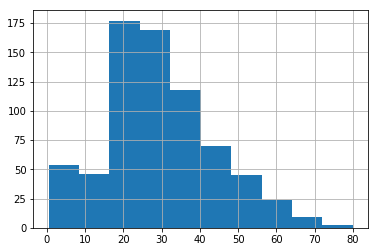

In [7]:
train_df['Age'].hist()
train_df['Age'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

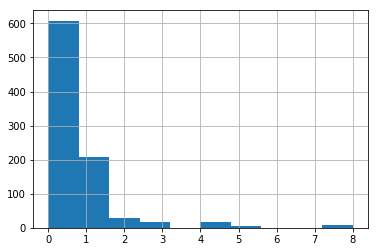

In [8]:
train_df['SibSp'].hist()
train_df['SibSp'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

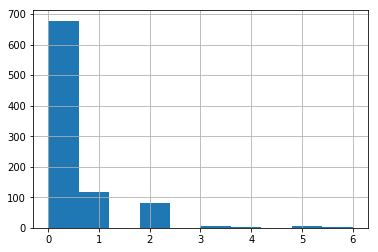

In [9]:
train_df['Parch'].hist()
train_df['Parch'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

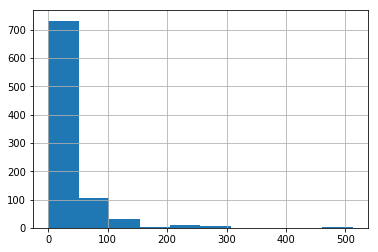

In [10]:
train_df['Fare'].hist()
train_df['Fare'].describe()

In [11]:
total_df = train_df.append(test_df_joined)
print(total_df.shape)
#(1309, 12)

(1309, 12)


C:\Users\woare\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [12]:
# check the nan data
total_df.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived          0
Ticket            0
dtype: int64

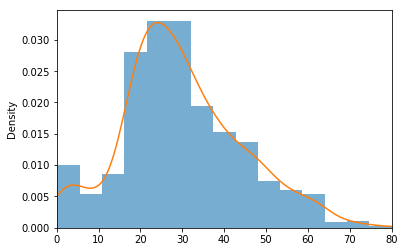

In [13]:
# find the replaceable data for the nan in the age.
# check the current data
ax = total_df["Age"].hist(bins=15, density=True, stacked=True, alpha=0.6)
total_df["Age"].plot(kind='density')
plt.xlim(0, total_df.Age.max())
plt.show()

In [14]:
# The data is skewed. the nan will be replace with median.
age_replace = total_df["Age"].median()
print(age_replace)

28.0


In [15]:
# find the replaceable data for the nan in the Embarked.
total_df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [16]:
embarked_replace = total_df.Embarked.value_counts().idxmax()
print(embarked_replace)

S


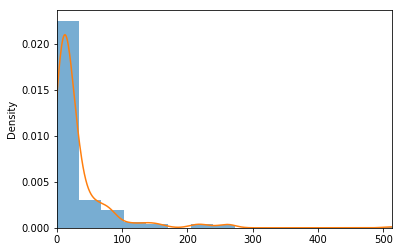

In [17]:
# find the replaceable data for the nan in the Fare.
# check the current data
ax = total_df.Fare.hist(bins=15, density=True, stacked=True, alpha=0.6)
total_df.Fare.plot(kind='density')
plt.xlim(0, total_df.Fare.max())
plt.show()

In [18]:
fare_replace = total_df.Fare.median()
print(fare_replace)

14.4542


In [19]:
# fill nan data to replace value
total_df.Age.fillna(age_replace, inplace=True)
total_df.Embarked.fillna(embarked_replace, inplace=True)
total_df.Fare.fillna(fare_replace, inplace=True)

total_df.isnull().sum()

Age               0
Cabin          1014
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived          0
Ticket            0
dtype: int64

In [20]:
'''
define filler function for data.

Change Sex col. male to 1, female to 0
change embarked col. C,Q,S to 0,1,2

''' 
def SE_filter(df):
    for row_index, value in df.iterrows():
        # Change Sex col. male to 1, female to 0
        if value.Sex == 'male':
            df.at[row_index, 'Sex'] = 1
        elif value.Sex == 'female':
            df.at[row_index, 'Sex'] = 0
        
        # change embarked col. C,Q,S to 0,1,2
        if value.Embarked == 'C':
            df.at[row_index, 'Embarked'] = 0
        elif value.Embarked == 'Q':
            df.at[row_index, 'Embarked'] = 1
        elif value.Embarked == 'S':
            df.at[row_index, 'Embarked'] = 2
    
    df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
        
    return df

In [21]:
# replace Sex and Embarked to number
# drop 'PassengerId', 'Name', 'Ticket', 'Cabin'
total_df = SE_filter(total_df)

# print(total_df.Sex)
# print(total_df.Embarked)

In [22]:
total_df_y = total_df.Survived.copy()
total_df_x = total_df.drop(columns=['Survived'])

print(total_df_y.shape)
print(total_df_x.shape)

(1309,)
(1309, 7)


In [23]:
total_df_x.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp
0,22.0,1,7.2500,0,3,1,1
1,38.0,2,71.2833,0,1,0,1
2,26.0,1,7.9250,0,3,1,0
3,35.0,2,53.1000,0,1,1,1
4,35.0,2,8.0500,0,3,0,0


In [24]:
# data normailzation
total_df_x_norm = (total_df_x - total_df_x.mean())/total_df_x.std()

total_df_x_norm.mean()

Age         3.835740e-17
Embarked    2.317135e-16
Fare       -6.679997e-16
Parch      -5.920059e-17
Pclass     -4.829343e-16
Sex         1.969395e-16
SibSp       2.178887e-16
dtype: float64

In [25]:
total_df_x_norm.std()**2

Age         1.0
Embarked    1.0
Fare        1.0
Parch       1.0
Pclass      1.0
Sex         1.0
SibSp       1.0
dtype: float64

In [26]:
total_df_x_norm.dtypes

Age         float64
Embarked     object
Fare        float64
Parch       float64
Pclass      float64
Sex          object
SibSp       float64
dtype: object

In [27]:
# change object type to number type
total_df_x_norm.Embarked = pd.to_numeric(total_df_x_norm.Embarked)
total_df_x_norm.Sex = pd.to_numeric(total_df_x_norm.Sex)
total_df_x_norm.dtypes

Age         float64
Embarked    float64
Fare        float64
Parch       float64
Pclass      float64
Sex         float64
SibSp       float64
dtype: object

In [28]:
# datafram to numpy array
total_x = total_df_x_norm.values
total_y = total_df_y.values

print(total_x.shape)
print(type(total_x))
print(total_x.dtype)
print('-----------')
print(total_y.shape)
print(type(total_y))
print(total_y.dtype)

(1309, 7)
<class 'numpy.ndarray'>
float64
-----------
(1309,)
<class 'numpy.ndarray'>
int64


In [29]:
# save the data
np.save(inputpath+'total_x', total_x)
np.save(inputpath+'total_y', total_y)

# load the data
loaded_x = np.load(inputpath+'total_x.npy')
loaded_y = np.load(inputpath+'total_y.npy')

print(loaded_x.shape)
print(loaded_y.shape)

(1309, 7)
(1309,)


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as utils
import graphviz
from torch.autograd import Variable
from subprocess import check_call
from sklearn import metrics
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from PIL import Image, ImageDraw, ImageFont

In [31]:
# load the data
inputpath = './input/'
train_index = 891
x_loaded = np.load(inputpath+'total_x.npy')
y_loaded = np.load(inputpath+'total_y.npy')

lr_x_loaded = x_loaded

print(x_loaded.shape)
print(y_loaded.shape)

(1309, 7)
(1309,)


In [32]:
# sprit the data
x_train = x_loaded[:train_index, :]
y_train = y_loaded[:train_index]
x_test = x_loaded[train_index:, :]
y_test = y_loaded[train_index:]

In [33]:
def decision_tree_depth(x_train, y_train, x_test, y_test, max_depth):
    best = 0
    best_auc = 0
    best_model= object()
    for i in range(max_depth):
        if i ==0:
            continue
        di_decision_tree = DecisionTreeClassifier(max_depth=i)
        di_decision_tree.fit(x_train, y_train)

        di_y_pred = di_decision_tree.predict(x_test)
        acc_di_decision_tree = round(di_decision_tree.score(x_train, y_train) * 100, 2)
        didt_auc_score = metrics.roc_auc_score(y_test, di_y_pred)
        #print('in depth {} decision_tree acc: {}, AUC: {}'.format(i, acc_di_decision_tree, didt_auc_score))
        
        if didt_auc_score > best_auc:
            best_auc = didt_auc_score
            best = i
            best_model = di_decision_tree
    print('{} depth decision tree got the best AUC: {}'.format(best, best_auc))
    
    return best_model

In [34]:
decision_tree = decision_tree_depth(x_train, y_train, x_test, y_test, max_depth=21)

2 depth decision tree got the best AUC: 0.7683270676691729


In [35]:
decision_tree = DecisionTreeClassifier(max_depth=2)
decision_tree.fit(x_train, y_train)

dt_y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
dt_auc_score = metrics.roc_auc_score(y_test, dt_y_pred)
print('decision_tree acc: {}, AUC: {}'.format(acc_decision_tree, dt_auc_score))

decision_tree acc: 71.16, AUC: 0.7683270676691729


In [36]:
def random_forest_est(x_train, y_train, x_test, y_test, max_est, oob_sore=False):
    best = 0
    best_auc = 0
    best_model = object()
    for i in range(max_est):
        if i ==0:
            continue
        random_forest = RandomForestClassifier(n_estimators=i, oob_score=oob_sore)
        random_forest.fit(x_train, y_train)

        rf_y_pred = random_forest.predict(x_test)

        random_forest.score(x_train, y_train)
        acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
        rf_auc_score = metrics.roc_auc_score(y_test, rf_y_pred)
        #print('in {} est random forrest, acc: {}, AUC: {}'.format(i, acc_random_forest, rf_auc_score))
        if rf_auc_score > best_auc:
            best_auc = rf_auc_score
            best = i
            best_model = random_forest
    print('in random forrest with n_estimators = {}, got the best AUC: {}'.format(best, best_auc))
    return best_model

In [37]:
random_forest = random_forest_est(x_train, y_train, x_test, y_test, 100)
rf_y_pred = random_forest.predict(x_test)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
rf_auc_score = metrics.roc_auc_score(y_test, rf_y_pred)
print('random forrest, acc: {}, AUC: {}'.format(acc_random_forest, rf_auc_score))

in random forrest with n_estimators = 12, got the best AUC: 0.712406015037594
random forrest, acc: 97.19, AUC: 0.712406015037594


In [38]:
# to catch close to 99% and more than 90%. therefore k = 6
k = 6
pca = PCA(n_components=k)

# train with train data and apply to all data.
pca.fit(x_train)
pca_x_loaded = pca.transform(x_loaded)
pca_x_loaded.shape

(1309, 6)

In [39]:
def data_dataloader(data, label, train_index):
    
    dev_index = int(np.float(train_index * 0.85))
    
    # split data to train and test set
    train_data = data[:train_index,:]
    train_label = label[:train_index]
    dev_data = train_data[dev_index:,:]
    dev_label = train_label[dev_index:]
    test_data = data[train_index:,:]
    test_label = label[train_index:]
    
    '''
    print(train_data.shape)
    print(train_label.shape)
    print(dev_data.shape)
    print(dev_label.shape)
    print(test_data.shape)
    print(test_label.shape)
    '''
    
    # np_array to tensor
    train_data, train_label = torch.Tensor(train_data), torch.Tensor(train_label)
    dev_data, dev_label = torch.Tensor(dev_data), torch.Tensor(dev_label)
    test_data, test_label = torch.Tensor(test_data), torch.Tensor(test_label)
    
    # tensor to dataset
    train_dataset = utils.TensorDataset(train_data, train_label)
    dev_dataset = utils.TensorDataset(dev_data, dev_label)
    test_dataset = utils.TensorDataset(test_data, test_label)
    
    # dataset to dataloader
    train_dataloader = utils.DataLoader(train_dataset)
    dev_dataloader = utils.DataLoader(dev_dataset)
    test_dataloader = utils.DataLoader(test_dataset)
    
    return train_dataloader, dev_dataloader, test_dataloader

In [40]:
# take data and produce dataloaders
lr_train_dataloader, lr_dev_dataloader, lr_test_dataloader = data_dataloader(lr_x_loaded, y_loaded, train_index=train_index)
pca_train_dataloader, pca_dev_dataloader, pca_test_dataloader = data_dataloader(pca_x_loaded, y_loaded, train_index=train_index)

In [41]:
# set variables 
lr_input_size = lr_x_loaded.shape[1]
pca_input_size = pca_x_loaded.shape[1]
output_size = 1
num_epochs = 5
learning_rate = 0.1

In [42]:
# create the model for Logistic Regression 
class LogisticRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        return F.sigmoid(self.linear(x))

In [43]:
# set model, criterion, and optimizer.
lr_model = LogisticRegression(lr_input_size, output_size)
pca_model = LogisticRegression(pca_input_size, output_size)

criterion = nn.BCELoss()
lr_optimizer = torch.optim.SGD(lr_model.parameters(), lr=learning_rate)
pca_optimizer = torch.optim.SGD(pca_model.parameters(), lr=learning_rate)


In [44]:
def train(model, num_epochs, criterion, optimizer, train_dataloader, dev_dataloader, test_dataloader):
    for epoch in range(num_epochs):
        for i, (train_data, train_label) in enumerate(train_dataloader):

            y_pred = model(train_data)

            loss = criterion(y_pred, train_label)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    correct = 0
    total = 0

    for dev_data, dev_label in dev_dataloader:

        output = model(dev_data)
        output = output.round()
        total += dev_label.size(0)
        correct += (output == dev_label).sum()

    print('In the Dev, Accuracy: {:.4f}%, correct: {}, total: {}'.format((100 * correct.item() / total), correct, total))


    correct = 0
    total = 0

    outputs, labels = [], []


    for test_data, test_label in test_dataloader:

        output = model(test_data)
        output = output.round()
        total += test_label.size(0)
        correct += (output == test_label).sum()

        outputs.append(output.item())
        labels.append(test_label.item())
        
    precision = metrics.average_precision_score(labels, outputs)
    recall = metrics.recall_score(labels, outputs)

    print('In the test, Accuracy: {:.4f}%, Precision: {:.4f}%, recall: {:.4f}%, correct: {}, total: {}'.format((100 * correct.item() / total), precision, recall, correct, total))
    
    return outputs

In [45]:
'''
x_train
y_train
x_test
y_test
'''
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [46]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)



LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [47]:
def acc_precision_recall(labels, outputs):
    accuracy = metrics.accuracy_score(labels, outputs)
    precision = metrics.average_precision_score(labels, outputs)
    recall = metrics.recall_score(labels, outputs)

    print('In the test, Accuracy: {:.4f}%, Precision: {:.4f}%, recall: {:.4f}%'.format(accuracy, precision, recall))

In [48]:
print('----in pure Logistic_Regression----')
lr_outputs = train(lr_model, num_epochs, criterion, lr_optimizer, lr_train_dataloader, lr_dev_dataloader, lr_test_dataloader)
print('----in Logistic_Regression with PCA----')
pca_outputs = train(pca_model, num_epochs, criterion, pca_optimizer,  pca_train_dataloader, pca_dev_dataloader, pca_test_dataloader)
print('----in Decision tree----')
dt_outputs = decision_tree.predict(x_test)
acc_precision_recall(y_test, dt_outputs)
print('----in Random forrest----')
rf_outputs = random_forest.predict(x_test)
acc_precision_recall(y_test, rf_outputs)
print('----in KNN----')
knn_outputs = knn.predict(x_test)
acc_precision_recall(y_test, knn_outputs)
print('----in SVM----')
svm_outputs = linear_svc.predict(x_test)
acc_precision_recall(y_test, svm_outputs)

outputs = []
labels = y_test

outputs.append(np.asarray(lr_outputs))
outputs.append(np.asarray(pca_outputs))
outputs.append(np.asarray(dt_outputs))
outputs.append(np.asarray(rf_outputs))
outputs.append(np.asarray(knn_outputs))
outputs.append(np.asarray(svm_outputs))
outputs = np.asarray(outputs)

----in pure Logistic_Regression----


C:\Users\woare\Anaconda3\lib\site-packages\torch\nn\functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
C:\Users\woare\Anaconda3\lib\site-packages\torch\nn\functional.py:1594: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


In the Dev, Accuracy: 82.8358%, correct: 111, total: 134
In the test, Accuracy: 82.2967%, Precision: 0.6610%, recall: 0.7632%, correct: 344, total: 418
----in Logistic_Regression with PCA----
In the Dev, Accuracy: 82.8358%, correct: 111, total: 134
In the test, Accuracy: 83.9713%, Precision: 0.6876%, recall: 0.8026%, correct: 351, total: 418
----in Decision tree----
In the test, Accuracy: 0.8254%, Precision: 0.6826%, recall: 0.5592%
----in Random forrest----
In the test, Accuracy: 0.7344%, Precision: 0.5355%, recall: 0.6316%
----in KNN----
In the test, Accuracy: 0.7249%, Precision: 0.5280%, recall: 0.6579%
----in SVM----
In the test, Accuracy: 0.7560%, Precision: 0.5575%, recall: 0.5789%


In [51]:
def plot_roc_and_auc_score(outputs, labels, title):
    
    # plot for LR
    lr_false_positive_rate, lr_true_positive_rate, threshold = metrics.roc_curve(labels, outputs[0])
    lr_auc_score = metrics.roc_auc_score(labels, outputs[0])
    plt.plot(lr_false_positive_rate, lr_true_positive_rate, label = 'Pure LR, AREA = {:.4f}'.format(lr_auc_score))
    
    # plot for PCA
    pca_false_positive_rate, pca_true_positive_rate, threshold = metrics.roc_curve(labels, outputs[1])
    pca_auc_score = metrics.roc_auc_score(labels, outputs[1])
    plt.plot(pca_false_positive_rate, pca_true_positive_rate, label = 'LR w PCA, AREA = {:.4f}'.format(pca_auc_score))
    
    # plot for decision tree
    dt_false_positive_rate, dt_true_positive_rate, threshold = metrics.roc_curve(labels, outputs[2])
    dt_auc_score = metrics.roc_auc_score(labels, outputs[2])
    plt.plot(dt_false_positive_rate, dt_true_positive_rate, label = 'D_Tree w PCA, AREA = {:.4f}'.format(dt_auc_score))
    
    # plot for random forrest
    rf_false_positive_rate, rf_true_positive_rate, threshold = metrics.roc_curve(labels, outputs[3])
    rf_auc_score = metrics.roc_auc_score(labels, outputs[3])
    plt.plot(rf_false_positive_rate, rf_true_positive_rate, label = 'R_forrest w PCA, AREA = {:.4f}'.format(rf_auc_score))
    
    # plot for knnn
    knn_false_positive_rate, knn_true_positive_rate, threshold = metrics.roc_curve(labels, outputs[4])
    knn_auc_score = metrics.roc_auc_score(labels, outputs[4])
    plt.plot(knn_false_positive_rate, knn_true_positive_rate, label = 'knn w PCA, AREA = {:.4f}'.format(knn_auc_score))
    
    # plot for svm
    svm_false_positive_rate, svm_true_positive_rate, threshold = metrics.roc_curve(labels, outputs[5])
    svm_auc_score = metrics.roc_auc_score(labels, outputs[5])
    plt.plot(svm_false_positive_rate, svm_true_positive_rate, label = 'knn w SVM, AREA = {:.4f}'.format(svm_auc_score))
    
    
    plt.plot([0,1], [0,1], 'red')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.axis([0, 1, 0, 1])
    plt.title(title)
    plt.legend(loc = 'lower right')
    plt.show()

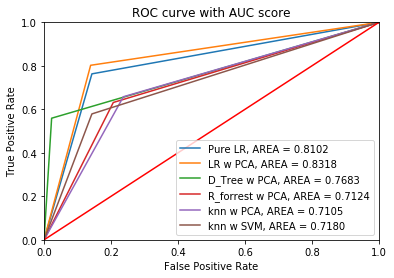

In [52]:
plot_roc_and_auc_score(outputs, labels, title = 'ROC curve with AUC score')

In [50]:
###################################################
# compare to other data modification
##############################

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import graphviz

from matplotlib import pyplot as plt
from matplotlib import style

from sklearn import tree
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC

In [55]:
inputpath = './input/'

train_df = pd.read_csv(inputpath+'train.csv')
test_df = pd.read_csv(inputpath+'test.csv')
gender_df = pd.read_csv(inputpath+'gender_submission.csv')

print(train_df.shape)
print(test_df.shape)
print(gender_df.shape)

train_index = train_df.shape[0]
print('train_index: ' + str(train_index))

(891, 12)
(418, 11)
(418, 2)
train_index: 891


In [56]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head()

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


C:\Users\woare\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\woare\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\woare\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\woare\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


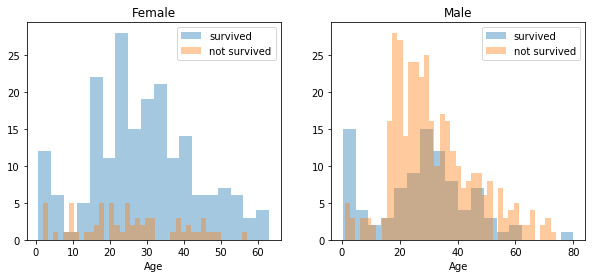

In [57]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

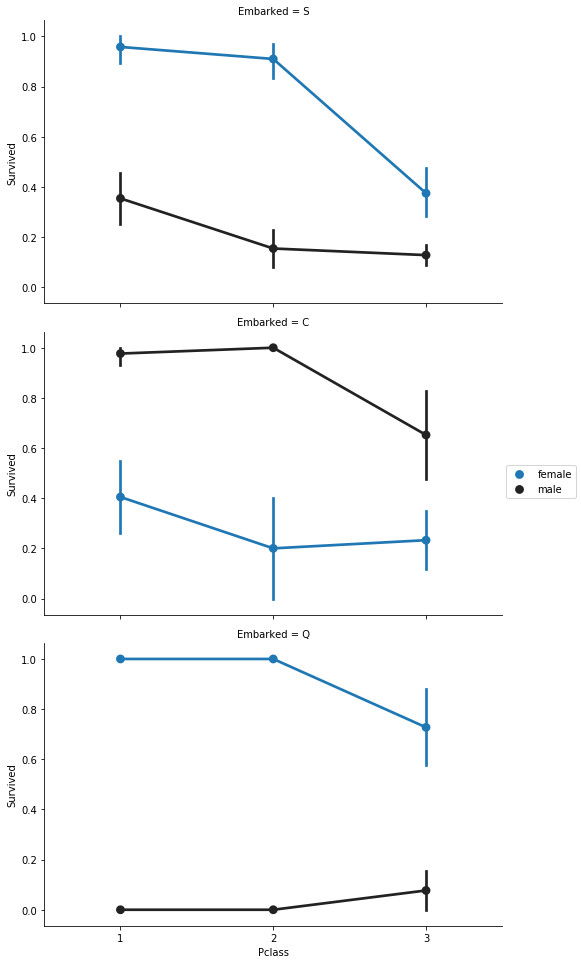

In [58]:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

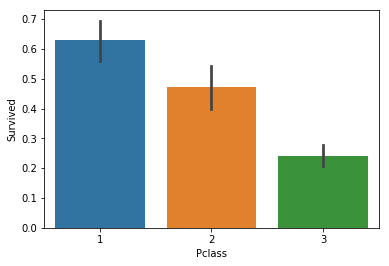

In [59]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

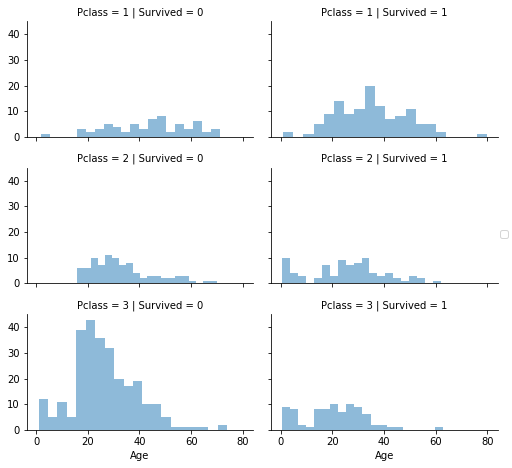

In [60]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [61]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)

In [62]:
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

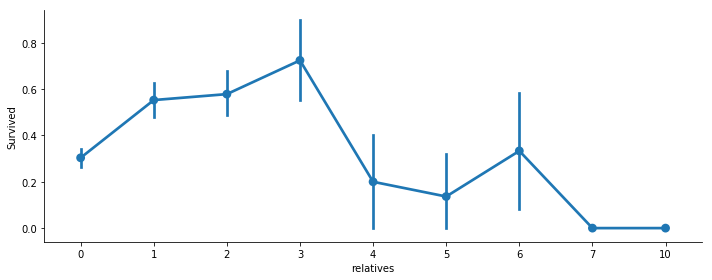

In [63]:
axes = sns.factorplot('relatives','Survived', data=train_df, aspect = 2.5)

In [64]:
train_df = train_df.drop(['PassengerId'], axis=1)

In [65]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int) 

In [66]:
# we can now drop the cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [67]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)

In [68]:
train_df["Age"].isnull().sum()

0

In [69]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [70]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [71]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Name         891 non-null object
Sex          891 non-null object
Age          891 non-null int32
SibSp        891 non-null int64
Parch        891 non-null int64
Ticket       891 non-null object
Fare         891 non-null float64
Embarked     891 non-null object
relatives    891 non-null int64
not_alone    891 non-null int32
Deck         891 non-null int32
dtypes: float64(1), int32(3), int64(5), object(4)
memory usage: 80.1+ KB


In [72]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [73]:
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)

In [74]:
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [75]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [76]:
train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [77]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

In [78]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [79]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [80]:
# let's see how it's distributed
train_df['Age'].value_counts()

4    165
6    155
5    152
3    141
2    120
1     90
0     68
Name: Age, dtype: int64

In [81]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,7,0,1,0,8,1
1,1,1,1,5,1,0,71,1,1,0,3,3
2,1,3,1,3,0,0,7,0,0,1,8,2
3,1,1,1,5,1,0,53,0,1,0,3,3
4,0,3,0,5,0,0,8,0,0,1,8,1
5,0,3,0,4,0,0,8,2,0,1,8,1
6,0,1,0,6,0,0,51,0,0,1,5,1
7,0,3,0,0,3,1,21,0,4,0,8,4
8,1,3,1,3,0,2,11,0,2,0,8,3
9,1,2,1,1,1,0,30,1,1,0,8,3


In [82]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [83]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [84]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

In [85]:
# Let's take a last look at the training set, before we start training the models.
train_df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1
5,0,3,0,4,0,0,1,2,0,1,8,1,12,1
6,0,1,0,6,0,0,3,0,0,1,5,1,6,3
7,0,3,0,0,3,1,2,0,4,0,8,4,0,0
8,1,3,1,3,0,2,1,0,2,0,8,3,9,0
9,1,2,1,1,1,0,2,1,1,0,8,3,2,1


In [86]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

In [87]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

92.48 %


In [88]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test)

outputs = np.append(outputs, [Y_pred], axis=0)
print(outputs.shape)

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(round(acc_decision_tree,2,), "%")

(7, 418)
92.48 %


In [89]:
train_df  = train_df.drop("not_alone", axis=1)
test_df  = test_df.drop("not_alone", axis=1)

train_df  = train_df.drop("Parch", axis=1)
test_df  = test_df.drop("Parch", axis=1)

In [90]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

outputs = np.append(outputs, [Y_prediction], axis=0)
print(outputs.shape)

(8, 418)


In [91]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

outputs = np.append(outputs, [Y_pred], axis=0)
print(outputs.shape)

(9, 418)


In [92]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

outputs = np.append(outputs, [Y_pred], axis=0)
print(outputs.shape)

(10, 418)


In [93]:
#######################################################

In [94]:
def acc_precision_recall(labels, outputs):
    accuracy = metrics.accuracy_score(labels, outputs)
    precision = metrics.average_precision_score(labels, outputs)
    recall = metrics.recall_score(labels, outputs)
    auc = metrics.roc_auc_score(labels, outputs)

    print('In the test, Accuracy: {:.4f}, Precision: {:.4f}, recall: {:.4f}, AUC: {:.4f}'.format(accuracy, precision, recall, auc))

In [99]:
def print_acc_precision_recall(outputs, labels):
    i = 0
    print('----in pure Logistic_Regression----')
    acc_precision_recall(outputs[i], labels)
    i += 1
    print('----in Logistic_Regression with PCA----')
    acc_precision_recall(outputs[i], labels)
    i += 1
    print('----in Decision tree----')
    acc_precision_recall(outputs[i], labels)
    i += 1
    print('----in Random forrest----')
    acc_precision_recall(outputs[i], labels)
    i += 1
    print('----in KNN ----')
    acc_precision_recall(outputs[i], labels)
    i += 1
    print('----in SVM ----')
    acc_precision_recall(outputs[i], labels)
    i += 1
    print('############## compare ################')
    print('----in Decision tree----')
    acc_precision_recall(outputs[i], labels)
    i += 1
    print('----in Random forrest----')
    acc_precision_recall(outputs[i], labels)
    i += 1
    print('----in KNN ----')
    acc_precision_recall(outputs[i], labels)
    i += 1
    print('----in SVM ----')
    acc_precision_recall(outputs[i], labels)
    i += 1

In [100]:
print_acc_precision_recall(outputs, y_test)

----in pure Logistic_Regression----
In the test, Accuracy: 0.8230, Precision: 0.6658, recall: 0.7532, AUC: 0.8084
----in Logistic_Regression with PCA----
In the test, Accuracy: 0.8397, Precision: 0.7044, recall: 0.7673, AUC: 0.8257
----in Decision tree----
In the test, Accuracy: 0.8254, Precision: 0.5367, recall: 0.9341, AUC: 0.8646
----in Random forrest----
In the test, Accuracy: 0.7344, Precision: 0.5331, recall: 0.6358, AUC: 0.7130
----in KNN ----
In the test, Accuracy: 0.7249, Precision: 0.5543, recall: 0.6135, AUC: 0.7048
----in SVM ----
In the test, Accuracy: 0.7560, Precision: 0.4953, recall: 0.6984, AUC: 0.7396
############## compare ################
----in Decision tree----
In the test, Accuracy: 0.8086, Precision: 0.6288, recall: 0.7432, AUC: 0.7938
----in Random forrest----
In the test, Accuracy: 0.8756, Precision: 0.7368, recall: 0.8425, AUC: 0.8679
----in KNN ----
In the test, Accuracy: 0.7536, Precision: 0.6169, recall: 0.6416, AUC: 0.7371
----in SVM ----
In the test, Acc

In [97]:
def plot_roc_and_auc_score(outputs, labels, title):
    
    i = 0
    
    # plot for LR
    lr_false_positive_rate, lr_true_positive_rate, threshold = metrics.roc_curve(labels, outputs[i])
    lr_auc_score = metrics.roc_auc_score(labels, outputs[i])
    plt.plot(lr_false_positive_rate, lr_true_positive_rate, label = 'Pure LR, AREA = {:.4f}'.format(lr_auc_score))
    i += 1
    
    # plot for PCA
    pca_false_positive_rate, pca_true_positive_rate, threshold = metrics.roc_curve(labels, outputs[i])
    pca_auc_score = metrics.roc_auc_score(labels, outputs[i])
    plt.plot(pca_false_positive_rate, pca_true_positive_rate, label = 'LR w PCA, AREA = {:.4f}'.format(pca_auc_score))
    i += 1
    
    # plot for decision tree
    dt_false_positive_rate, dt_true_positive_rate, threshold = metrics.roc_curve(labels, outputs[i])
    dt_auc_score = metrics.roc_auc_score(labels, outputs[i])
    plt.plot(dt_false_positive_rate, dt_true_positive_rate, label = 'D_Tree w PCA, AREA = {:.4f}'.format(dt_auc_score))
    i += 1
    
    # plot for random forrest
    rf_false_positive_rate, rf_true_positive_rate, threshold = metrics.roc_curve(labels, outputs[i])
    rf_auc_score = metrics.roc_auc_score(labels, outputs[i])
    plt.plot(rf_false_positive_rate, rf_true_positive_rate, label = 'R_forrest w PCA, AREA = {:.4f}'.format(rf_auc_score))
    i += 1
    
    # plot for knn
    knn_false_positive_rate, knn_true_positive_rate, threshold = metrics.roc_curve(labels, outputs[i])
    knn_auc_score = metrics.roc_auc_score(labels, outputs[i])
    plt.plot(knn_false_positive_rate, knn_true_positive_rate, label = 'knn w PCA, AREA = {:.4f}'.format(knn_auc_score))
    i += 1
    
    # plot for svm
    svm_false_positive_rate, svm_true_positive_rate, threshold = metrics.roc_curve(labels, outputs[i])
    svm_auc_score = metrics.roc_auc_score(labels, outputs[i])
    plt.plot(svm_false_positive_rate, svm_true_positive_rate, label = 'svm w PCA, AREA = {:.4f}'.format(svm_auc_score))
    i += 1
    

    # compare
    
    # plot for decision tree
    cdt_false_positive_rate, cdt_true_positive_rate, threshold = metrics.roc_curve(labels, outputs[1])
    cdt_auc_score = metrics.roc_auc_score(labels, outputs[i])
    plt.plot(cdt_false_positive_rate, cdt_true_positive_rate, label = 'C_D_Tree w PCA, AREA = {:.4f}'.format(cdt_auc_score))
    i += 1
    
    # plot for random forrest
    crf_false_positive_rate, crf_true_positive_rate, threshold = metrics.roc_curve(labels, outputs[1])
    crf_auc_score = metrics.roc_auc_score(labels, outputs[i])
    plt.plot(crf_false_positive_rate, crf_true_positive_rate, label = 'C_R_forrest w PCA, AREA = {:.4f}'.format(crf_auc_score))
    i += 1
    
    # plot for knn forrest
    cknn_false_positive_rate, cknn_true_positive_rate, threshold = metrics.roc_curve(labels, outputs[1])
    cknn_auc_score = metrics.roc_auc_score(labels, outputs[i])
    plt.plot(cknn_false_positive_rate, cknn_true_positive_rate, label = 'c_knn, AREA = {:.4f}'.format(cknn_auc_score))
    i += 1
    
    # plot for svm
    csvm_false_positive_rate, csvm_true_positive_rate, threshold = metrics.roc_curve(labels, outputs[i])
    csvm_auc_score = metrics.roc_auc_score(labels, outputs[i])
    plt.plot(csvm_false_positive_rate, csvm_true_positive_rate, label = 'c_svm w PCA, AREA = {:.4f}'.format(csvm_auc_score))
    i += 1
    
    
    plt.plot([0,1], [0,1], 'red')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.axis([0, 1, 0, 1])
    plt.title(title)
    plt.legend(loc = 'lower right')
    plt.show()

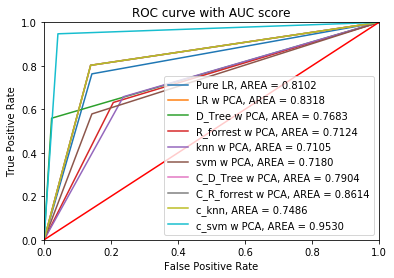

In [98]:
plot_roc_and_auc_score(outputs, labels, title = 'ROC curve with AUC score')